##  Health Insurance Cross Sell Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Joyal Shaji -**


# **Project Summary -**

For the Health Insurance Cross-Sell Prediction project, the primary objective was to predict whether a customer would be interested in purchasing additional insurance products. The dataset provided for this task contained approximately 400,000 rows and 12 columns. This dataset represented a wide variety of customer information, and the project involved several critical steps from data preprocessing to model evaluation.

The project began with an in-depth examination of the raw data using Python’s powerful data manipulation libraries, pandas and numpy. These tools were employed to clean the data, which involved handling missing values, correcting data types, and filtering out any irrelevant or redundant information. Following this, the dataset was visualized using matplotlib and seaborn, which provided valuable insights into the data distribution and relationships between features. These visualizations highlighted potential correlations and patterns that informed the feature engineering process.

To further enhance the dataset, hypothetical testing was conducted to validate assumptions and hypotheses regarding the data. This involved statistical tests to check the significance of various features and their impact on the target variable. Based on the insights gained, new features were generated from the existing columns, improving the dataset's richness and the potential predictive power of the models.

Given that the dataset was imbalanced, with a higher proportion of one class over the other, it was crucial to address this imbalance to avoid biased predictions. Techniques such as SMOTE (Synthetic Minority Over-sampling Technique) were applied to balance the classes in the training data. Additionally, the numerical features were scaled to ensure that they were on a similar scale, which is important for the performance of machine learning algorithms, particularly those that rely on distance measures, such as logistic regression.

Three different machine learning algorithms were employed to build predictive models: Logistic Regression, Random Forest, and XGBoost. Each model was evaluated using the ROC-AUC score, a robust metric for binary classification tasks that considers both sensitivity and specificity. Initially, these models achieved a good ROC-AUC score of 82%, indicating a strong ability to differentiate between customers likely and unlikely to purchase additional insurance.

To further enhance model performance, hyperparameter tuning was performed. This involved systematically adjusting the model parameters to find the optimal settings that would improve the model’s predictive accuracy. Alongside this, cross-validation was employed to ensure that the model's performance was consistent across different subsets of the data, thereby preventing overfitting. Through these efforts, the ROC-AUC score was successfully increased to 84%, marking a significant improvement in the model’s predictive power.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company. An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee. For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
!pip install seaborn
!pip install imbalanced-learn
!pip install missingno
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 5.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import kruskal

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import cross_val_score,StratifiedKFold,GridSearchCV,KFold,RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,roc_auc_score

### Dataset Loading

In [ ]:
# Load Dataset
df=pd.read_csv("health_insurance.csv")

### Dataset First View

In [ ]:
# Dataset First Look
df.head(20)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(381109, 12)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_counts = df.duplicated().value_counts()
print(duplicate_counts)

False    381109
Name: count, dtype: int64


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

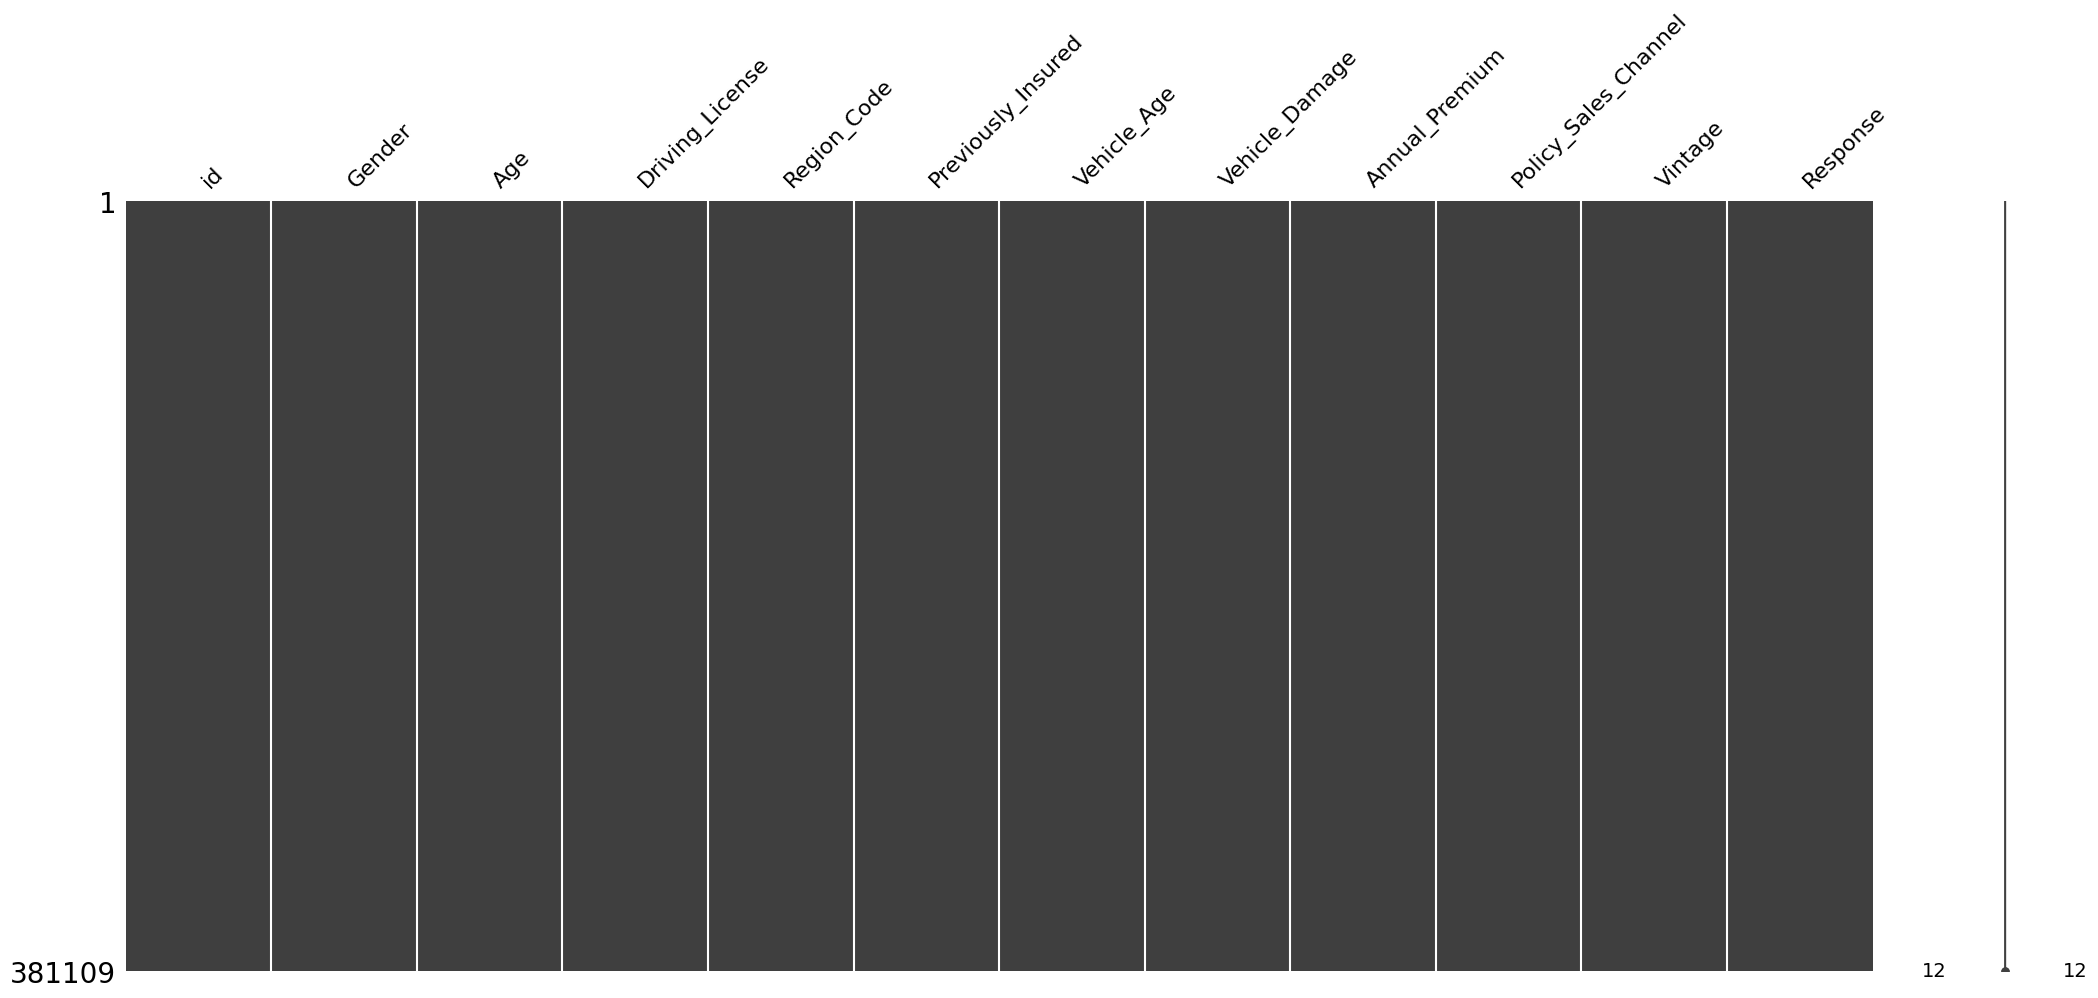

In [ ]:
# Visualizing the missing values
msno.matrix(df)
plt.show()

### What did you know about your dataset?

This dataset is a huge dataset with nearly 4 lakh rows and 12 columns, and we are trying to gather the information of the existing(previously insured in health insurance) and non existing(previously not insured in health insurance). So my task is to find whether the customers is going to buy the vehical insurance.And i found no columns with a missing values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Variables Description

so the important columns to be taken for our prediction is age,driving_licence,previously insured,vehical age vehical damage,annual premium,vintage. From the response column we can clearly say that only 12 percentage of people are giving the positive respnse.

1. id -> Description: Unique identifier for each record. It is typically used to distinguish between different entries in the dataset and is not usually used in modeling.
2. gender ->Description: The gender of the individual, likely represented as categorical values such as 'Male' and 'Female'. This variable can be encoded into numerical values or used directly in models that handle categorical data.
3. age ->Description: The age of the individual, usually a numerical value. This can be used as a feature in models to understand age-related trends.
4. driving licence ->Description: Indicates whether the individual has a driving license, typically represented as binary values (e.g., 1 for 'Yes' and 0 for 'No').
5. region code->Description: A code representing the geographical region or location of the individual. This is often a categorical variable that can be encoded into numerical values.
6. previously insured->Description: Indicates whether the individual was previously insured, typically represented as binary values (e.g., 1 for 'Yes' and 0 for 'No').
7. vehical age->Description: The age of the vehicle, often represented as categorical values (e.g., '<1 year', '1-2 years', '>2 years'). It may be converted into numerical values for modeling.
8. vehical dammage->Description: Indicates whether the vehicle has been damaged in the past, typically represented as binary values (e.g., 1 for 'Yes' and 0 for 'No').
9. annual premium->Description: The annual premium amount paid for the insurance policy. This is a continuous numerical variable.
10. policy sales channel->Description: The channel through which the policy was sold, often represented as categorical codes or IDs. This can be used to understand different sales channels' effectiveness.
11. vintage->Description: The number of days since the individual became a customer. It is a numerical variable that indicates the duration of the customer relationship.
12. response->Description: The target variable indicating whether the individual has responded to the insurance offer. It is typically binary (e.g., 0 for 'No' and 1 for 'Yes') and used in classification tasks.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
columns_to_remove=['Region_Code','Policy_Sales_Channel']
df2=df.drop(columns=columns_to_remove)
df2.head(20)

,id,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response
0,1,Male,44,1,0,> 2 Years,Yes,40454.0,217,1
1,2,Male,76,1,0,1-2 Year,No,33536.0,183,0
2,3,Male,47,1,0,> 2 Years,Yes,38294.0,27,1
3,4,Male,21,1,1,< 1 Year,No,28619.0,203,0
4,5,Female,29,1,1,< 1 Year,No,27496.0,39,0
5,6,Female,24,1,0,< 1 Year,Yes,2630.0,176,0
6,7,Male,23,1,0,< 1 Year,Yes,23367.0,249,0
7,8,Female,56,1,0,1-2 Year,Yes,32031.0,72,1
8,9,Female,24,1,1,< 1 Year,No,27619.0,28,0
9,10,Female,32,1,1,< 1 Year,No,28771.0,80,0


In [ ]:
def transform_vehicle_age(value):
    if value == '> 2 Years':
        return 3  # Replace with appropriate numeric value
    elif value == '< 1 Year':
        return 0  # Replace with appropriate numeric value
    elif value == '1-2 Year':
        return 1.5  # Calculate average of the range
    else:
        return None

In [ ]:
df2['Vehicle_Age_Transformed'] = df2['Vehicle_Age'].apply(transform_vehicle_age)

In [ ]:
df2['No_Prev_Insurance'] = df2.apply(lambda x: 1 if x['Driving_License'] == 1 and x['Previously_Insured'] == 0 else 0, axis=1)


In [ ]:
bins = [0, 30, 45, 60, 100]
labels = ['Young', 'Middle-aged', 'Senior', 'Elderly']
df2['Age_Group'] = pd.cut(df2['Age'], bins=bins, labels=labels)
df2['Age_Group'] = df2['Age_Group'].cat.codes

In [ ]:
bins = [0, 10000, 20000, 30000, 40000, 50000, 100000]
labels = ['Low', 'Below_Average', 'Average', 'Above_Average', 'High', 'Very_High']
df2['Premium_Bracket'] = pd.cut(df2['Annual_Premium'], bins=bins, labels=labels)
df2['Premium_Bracket'] = df2['Premium_Bracket'].cat.codes

In [ ]:
df2.head(20)

,id,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response,Vehicle_Age_Transformed,No_Prev_Insurance,Age_Group,Premium_Bracket
0,1,Male,44,1,0,> 2 Years,Yes,40454.0,217,1,3.0,1,1,4
1,2,Male,76,1,0,1-2 Year,No,33536.0,183,0,1.5,1,3,3
2,3,Male,47,1,0,> 2 Years,Yes,38294.0,27,1,3.0,1,2,3
3,4,Male,21,1,1,< 1 Year,No,28619.0,203,0,0.0,0,0,2
4,5,Female,29,1,1,< 1 Year,No,27496.0,39,0,0.0,0,0,2
5,6,Female,24,1,0,< 1 Year,Yes,2630.0,176,0,0.0,1,0,0
6,7,Male,23,1,0,< 1 Year,Yes,23367.0,249,0,0.0,1,0,2
7,8,Female,56,1,0,1-2 Year,Yes,32031.0,72,1,1.5,1,2,3
8,9,Female,24,1,1,< 1 Year,No,27619.0,28,0,0.0,0,0,2
9,10,Female,32,1,1,< 1 Year,No,28771.0,80,0,0.0,0,1,2


In [ ]:
df2['Premium_Bracket'].unique()

array([ 4,  3,  2,  0,  5,  1, -1], dtype=int8)

In [ ]:
response_counts = df2['Response'].value_counts()
response_counts

Response
0    334399
1     46710
Name: count, dtype: int64

In [ ]:
Q1 = df2['Annual_Premium'].quantile(0.25)
Q3 = df2['Annual_Premium'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Determine the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df2[(df2['Annual_Premium'] < lower_bound) | (df2['Annual_Premium'] > upper_bound)]

# Get the count of outliers
outlier_count = outliers.shape[0]

print("Count of outliers in Annual_Premium:", outlier_count)

Count of outliers in Annual_Premium: 10320


### What all manipulations have you done and insights you found?

from this i belive that this columns Region_Code,Policy_Sales_Channel will not do much impact on the prediction so i droped those. And then the vehical age columns not looks good so vehical age less than 1 i converted it to 0 and 1-2 like these values i took avg of it and greater than that i converted it to 3 and created a new column and named vehical age transformed. And also created another column for a person with driving licence and not previosly insured.And also i created two more columns for grouping the coustomers based on their age and annual premium.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

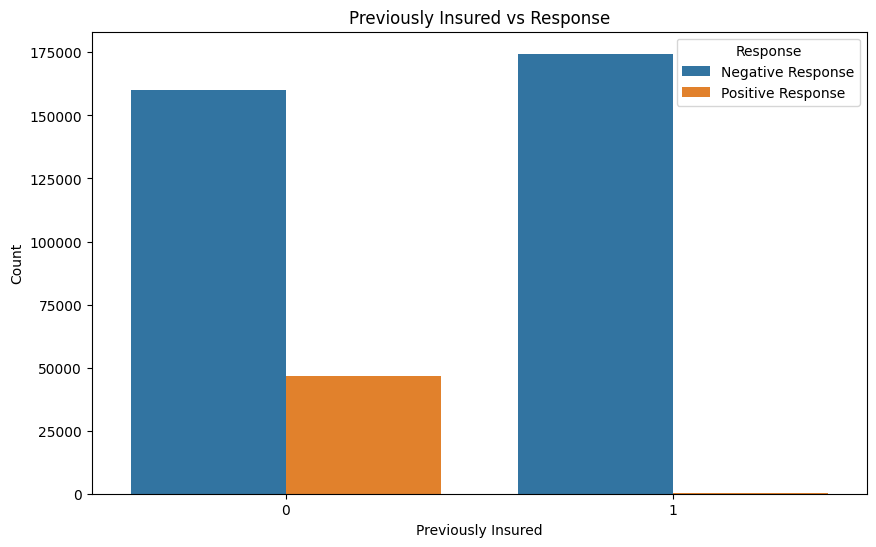

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(10, 6))
sns.countplot(x='Previously_Insured', hue='Response', data=df2)
plt.title('Previously Insured vs Response')
plt.xlabel('Previously Insured')
plt.ylabel('Count')
plt.legend(title='Response', labels=['Negative Response', 'Positive Response'])
plt.show()



##### 1. Why did you pick the specific chart?

The count plot is ideal for visualizing and comparing the frequency of occurrences of different categories in a categorical variable.

##### 2. What is/are the insight(s) found from the chart?

from this chart we can clearly say that the person who is previously insured in some other companies are not at all intrested to buy the insurance policy we offer and the person who is not insured in some other companies are showing intrests towards us.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes the gaind insights helps in a positie way like we are not needed to contact all the person in our dataset regarding of taking the policies, instead we can directly contact the people who are not previously insuerd in any other companies.

#### Chart - 2

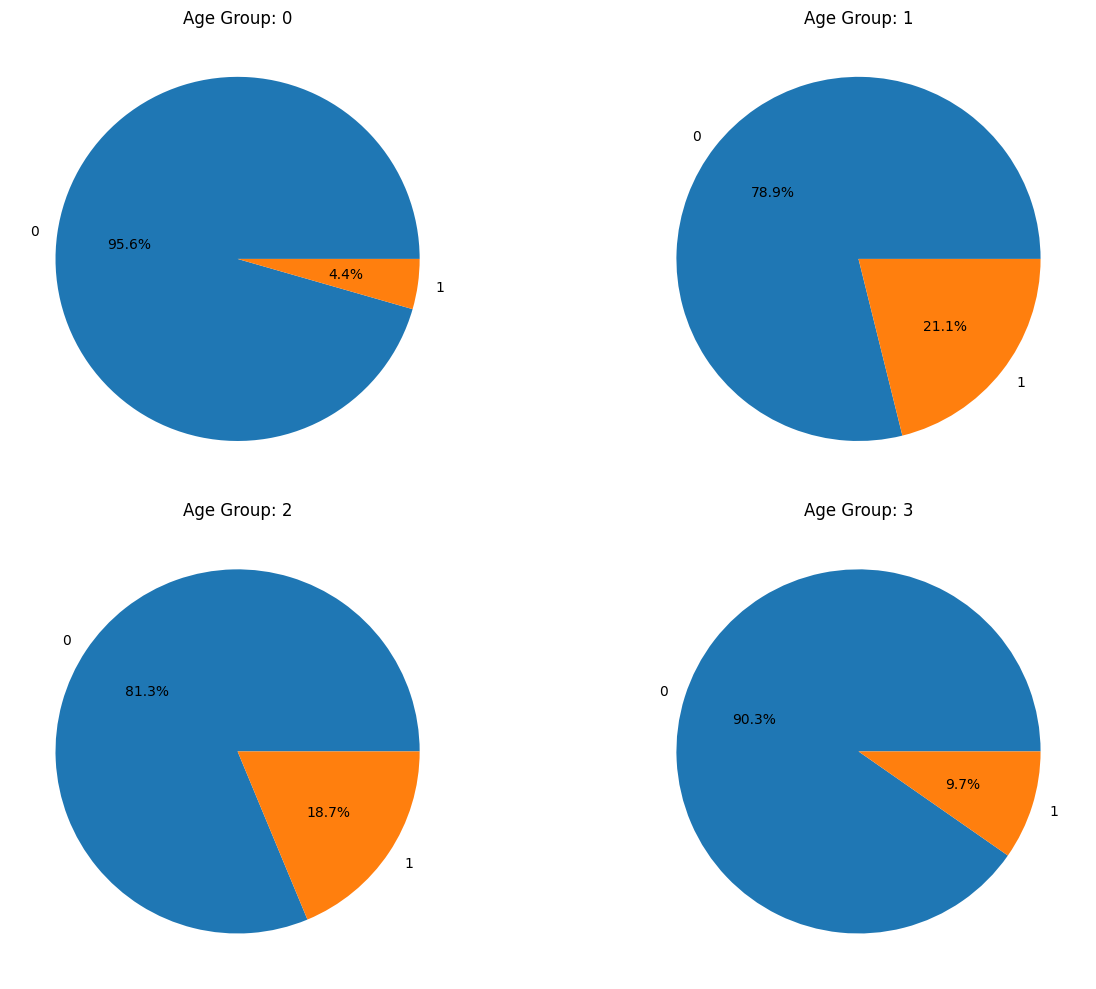

In [ ]:
# Chart - 2 visualization code
age_group_response = df2.groupby('Age_Group')['Response'].value_counts().unstack()

# Plot pie charts for each age group
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
for i, age_group in enumerate(age_group_response.index):
    age_group_response.loc[age_group].plot(kind='pie', autopct='%1.1f%%', ax=axes[i], title=f'Age Group: {age_group}')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are effective for displaying proportions of a whole. In this context, each pie chart represents an age group, and the slices of the pie chart show the proportion of positive versus negative responses within that age group.

##### 2. What is/are the insight(s) found from the chart?

here what i did is i have grouped the coustomers age into 4 types group 0:(0-30),group 1:(30-45),group 2:(45-60),and group 3:(60-100).
ok so from this we can say that number of people who is responding positively is in age group 1 and 2 that means people below the age of 30 and above the age of 60 are responding positively are less.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, so from this we can concentrate more on the people above the age 30 and below the age 60.

#### Chart - 3

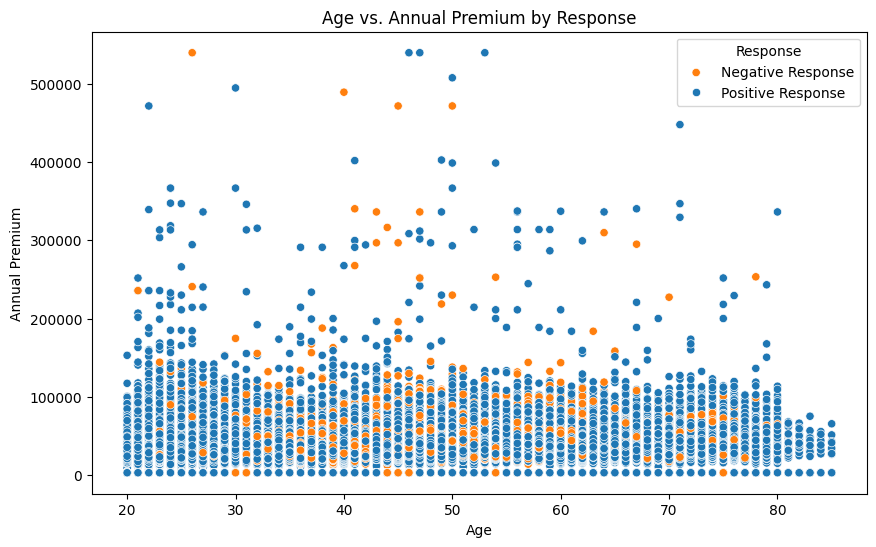

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Annual_Premium', hue='Response', data=df2)
plt.title('Age vs. Annual Premium by Response')
plt.xlabel('Age')
plt.ylabel('Annual Premium')
plt.legend(title='Response', labels=['Negative Response', 'Positive Response'])
plt.show()


##### 1. Why did you pick the specific chart?

Scatter plots are useful for showing how two continuous variables relate to each other. This can be particularly insightful if you're trying to understand feature interactions and their potential impact on the target variable.



##### 2. What is/are the insight(s) found from the chart?

 From this i can say that there is many outliers present in the annual premium column.And we will be clearing those outliers in future steps

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

from this we are not able to see the response rate properly but from the above preproccesing i found that the dataset is imbalnced so we will be clearing all that in future steps.


#### Chart - 4

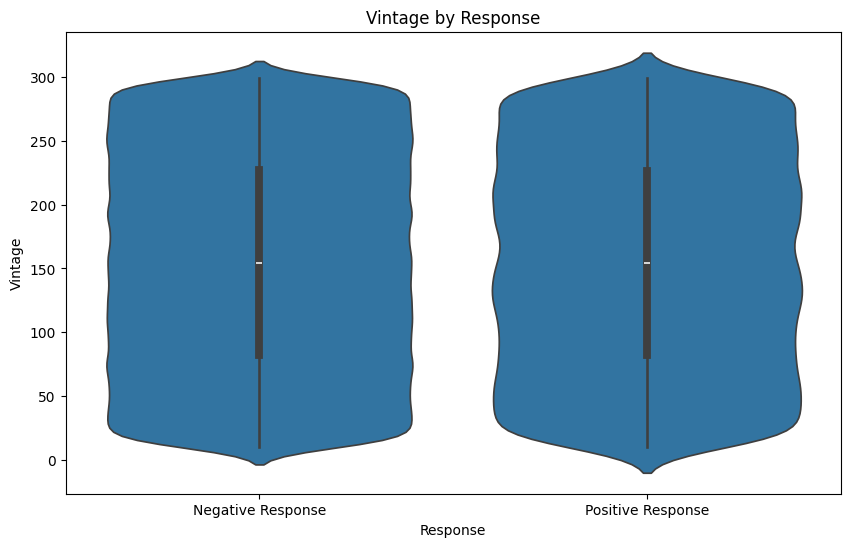

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(10, 6))
sns.violinplot(x='Response', y='Vintage', data=df2)
plt.title('Vintage by Response')
plt.xlabel('Response')
plt.ylabel('Vintage')
plt.xticks(ticks=[0, 1], labels=['Negative Response', 'Positive Response'])
plt.show()

##### 1. Why did you pick the specific chart?

 A violin plot combines aspects of box plots and density plots. It shows the distribution of Vintage for each class of Response, allowing you to compare how Vintage is distributed between negative and positive responses.

The response based on the vintage are seems to be same, so the people who are with the company are also giving negative as well as positive reviews.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

NO,So the response based on the vintage are seems to be same .

#### Chart - 5

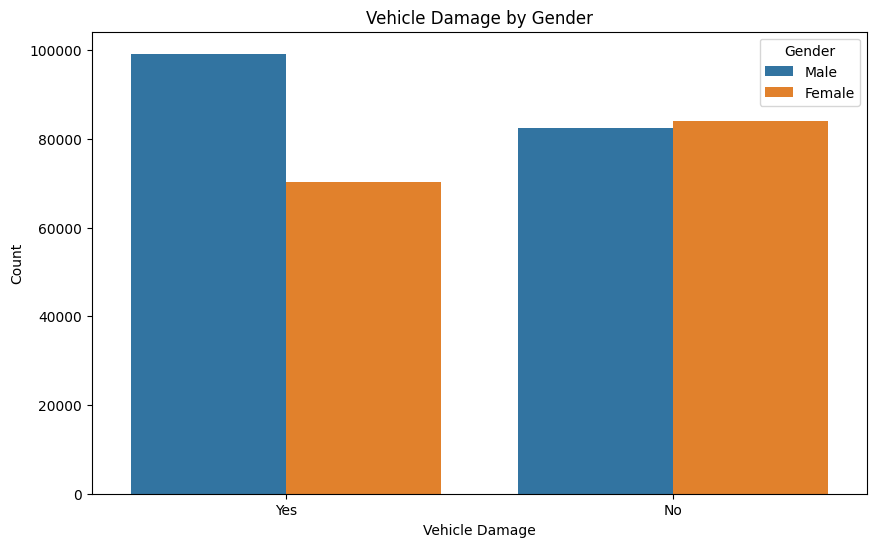

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(10, 6))
sns.countplot(x='Vehicle_Damage', hue='Gender', data=df2)
plt.title('Vehicle Damage by Gender')
plt.xlabel('Vehicle Damage')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

##### 1. Why did you pick the specific chart?

A count plot is effective for visualizing the distribution of categorical variables and their counts. In this case, it shows how the count of each Vehicle_Damage category varies by Gender.

##### 2. What is/are the insight(s) found from the chart?

from the above chart we can see that the male are more tented of making damage to the vehicals when compared with females.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes,it helps creating a positive business impact like from this we can see males are more tented of making damages to the vehicals so they are more consious of taking a insurance policy than females.

#### Chart - 6

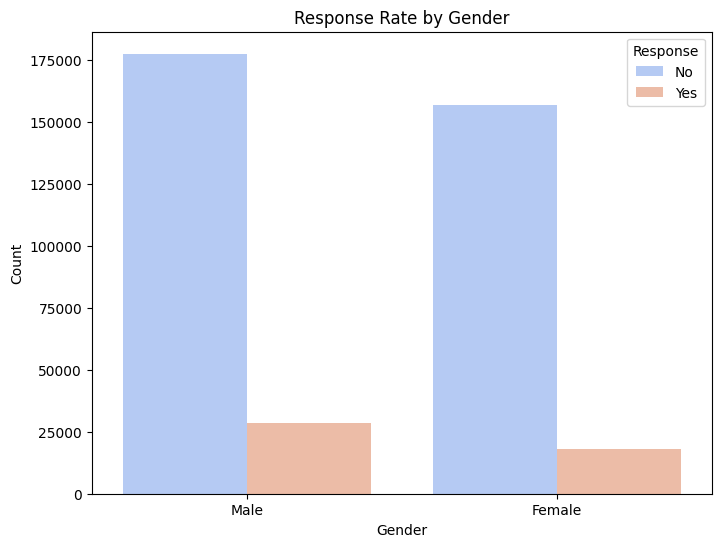

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(8, 6))

# Create a count plot for Response rate by Gender
sns.countplot(x='Gender', hue='Response', data=df2, palette='coolwarm')

# Set plot title and labels
plt.title('Response Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Response', labels=['No', 'Yes'])

# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

The count plot shows the distribution of responses within each gender category, making it easy to see which gender has a higher or lower count of positive and negative responses.


##### 2. What is/are the insight(s) found from the chart?

So from this chart we can say that male are giving more response when compared with females

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

so this helps giving a positive impact like from the chart 5 and 6 we can say like giving more preority to male are good because the response rate is more in males.

#### Chart - 7

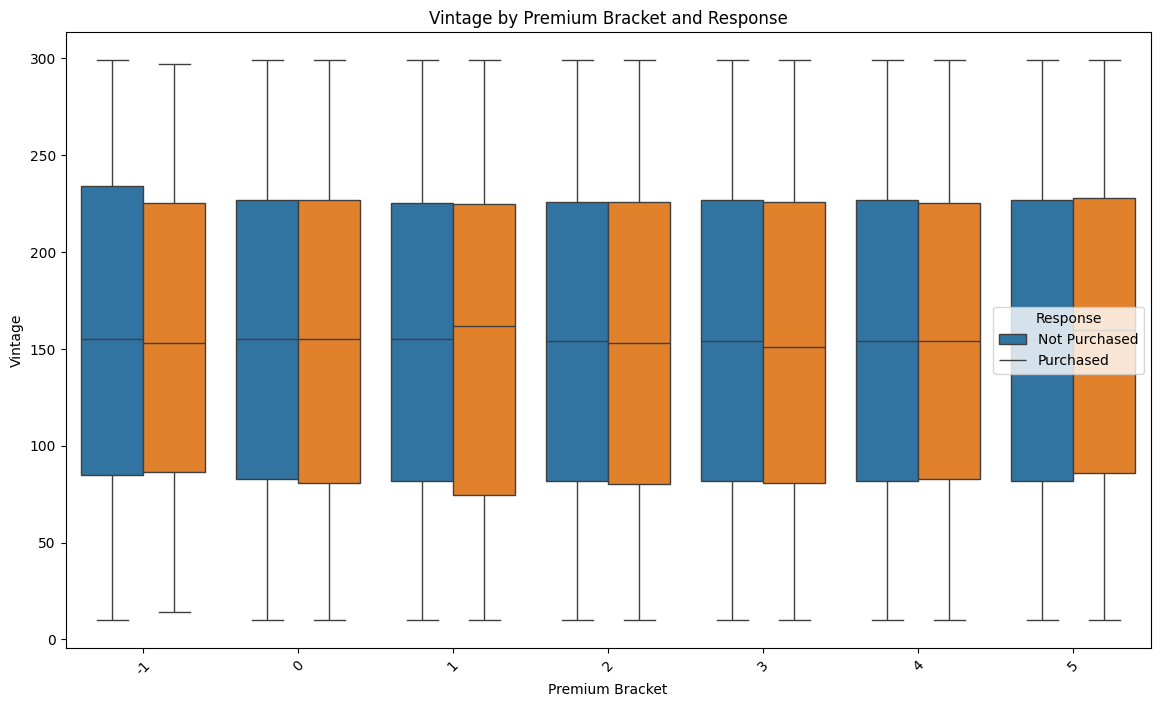

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(14, 8))
sns.boxplot(x='Premium_Bracket', y='Vintage', hue='Response', data=df2)
plt.title('Vintage by Premium Bracket and Response')
plt.xlabel('Premium Bracket')
plt.ylabel('Vintage')
plt.legend(title='Response', labels=['Not Purchased', 'Purchased'])
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Box plots provide a summary of the distribution of Vintage values for each Premium_Bracket, segmented by Response. This includes the median, quartiles, and potential outliers, giving you a detailed view of how Vintage varies within each premium bracket and response category.

##### 2. What is/are the insight(s) found from the chart?

so from this chart we can say that in almost all the premium bracket the average vintage that is the number of days the coustomer is with the company is 150 days.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

So from this we are getting a nutral graph.

#### Chart - 8

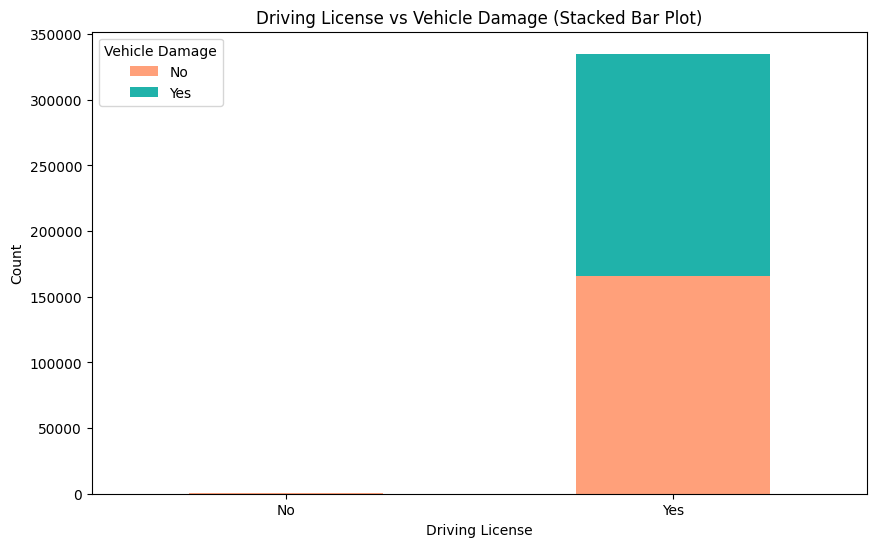

In [ ]:
# Chart - 8 visualization code
cross_tab = pd.crosstab(df2['Driving_License'], df2['Vehicle_Damage'])

# Plot the stacked bar plot
cross_tab.plot(kind='bar', stacked=True, color=['#FFA07A', '#20B2AA'], figsize=(10, 6))

# Set plot title and labels
plt.title('Driving License vs Vehicle Damage (Stacked Bar Plot)')
plt.xlabel('Driving License')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.legend(title='Vehicle Damage', labels=['No', 'Yes'])

# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

A stacked bar plot allows you to compare the distribution of Vehicle_Damage categories within each Driving_License category. It shows how the counts of Vehicle_Damage (e.g., Yes or No) are distributed across different levels of Driving_License.

##### 2. What is/are the insight(s) found from the chart?

so here we can say that people without driving licence are not making any damage to the vehicals and people with driving licence are more tented of doing damage .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insights help creating a positive business impact like the people with driving licence are making damage to the vehicals so the are more worried about it so by convincing them by saying the importance and advantages of buying a insurance will be easy.

#### Chart - 9

<ipython-input-32-0a1c1baa3db9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Vehicle_Age', data=df2, palette='pastel', order=['< 1 Year', '1-2 Year', '> 2 Years'])


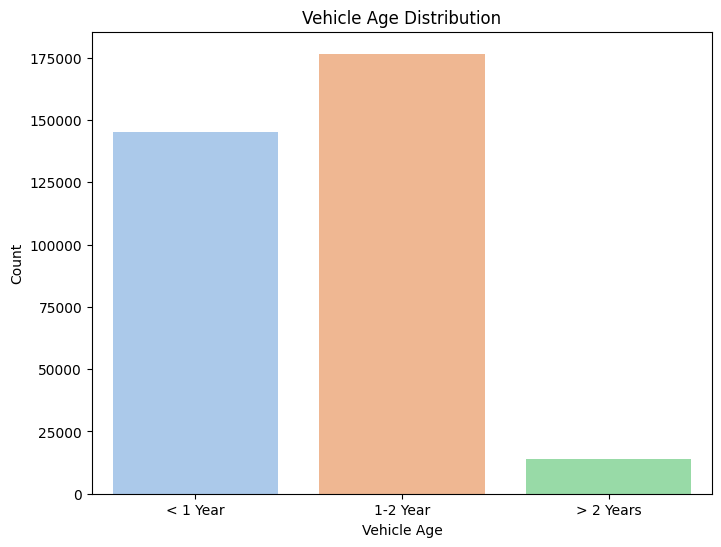

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(8, 6))

# Create a count plot for Vehicle Age Distribution
sns.countplot(x='Vehicle_Age', data=df2, palette='pastel', order=['< 1 Year', '1-2 Year', '> 2 Years'])

# Set plot title and labels
plt.title('Vehicle Age Distribution')
plt.xlabel('Vehicle Age')
plt.ylabel('Count')

# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

A count plot provides a straightforward visualization of the frequency of each category within Vehicle_Age. It shows how many vehicles fall into each age category, making it easy to see the distribution across the different age groups.

##### 2. What is/are the insight(s) found from the chart?

Here we can see the age of most of the vehicals are in range of 1-2 years and only less vehicals are in the above age of 2 years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes this will help in creating a positive business impact,here is my thought like the vehicals below the age of 1 is not at all needed to consider because they are new and will be already get insured when they buy it,so lets concentrate more on the next segment vehicals i.e, 1-2 and above 2.

#### Chart - 10

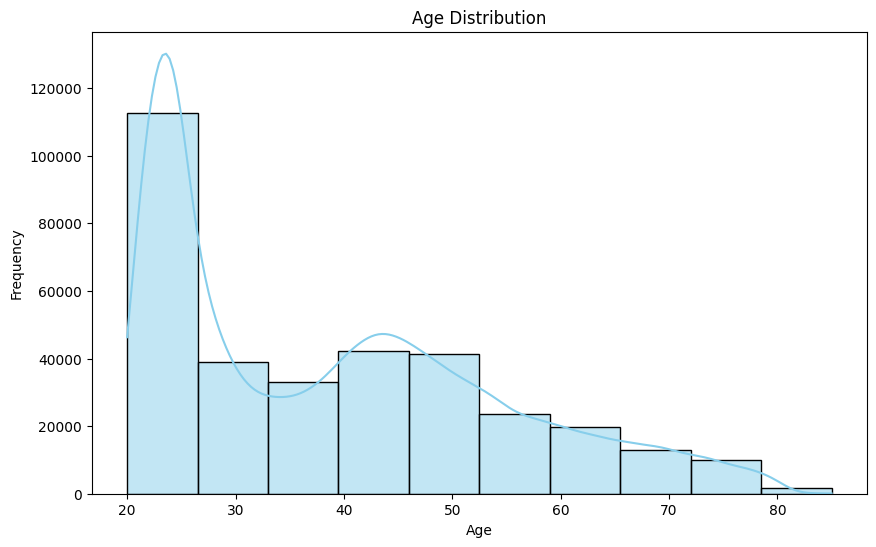

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(10, 6))

# Create a histogram for Age Distribution
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')

# Set plot title and labels
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

A histogram shows the distribution of Age values by dividing the data into bins and counting the frequency of observations within each bin. This allows you to see how the Age variable is distributed across different ranges.

##### 2. What is/are the insight(s) found from the chart?

this chart shows the distribution of age of the people in bins, so most of the people are in gae of 20-60.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes it helps, from chart 2 it shows more people in the age of 30-60 are giving positive response so it helps because there are many peoplle in this age that we can focus on..

#### Chart - 11

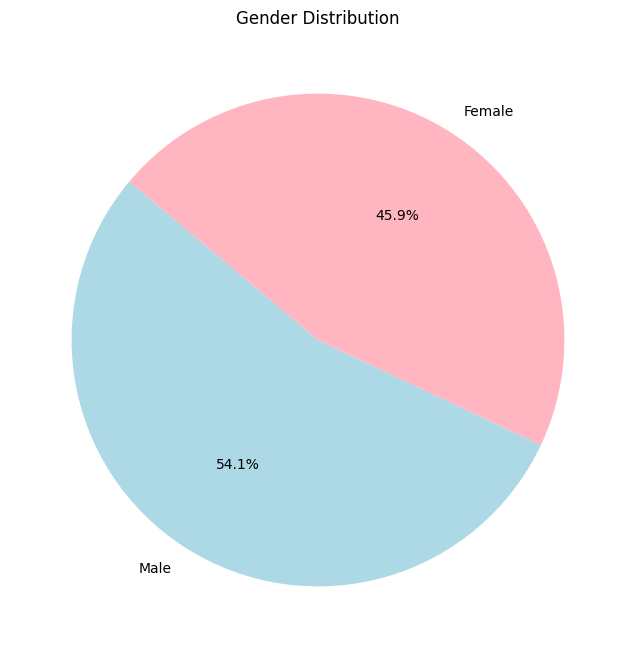

In [ ]:
# Chart - 11 visualization code
gender_counts = df2['Gender'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightpink'])
plt.title('Gender Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is excellent for displaying the proportion of each category within a whole. It shows the relative sizes of each gender category as a part of the total, making it easy to understand the distribution at a glance.

##### 2. What is/are the insight(s) found from the chart?

this chart shows the distribution of gender i.e, male and female in a pie chart


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes, it helps because the damage history is more in males when comapred with females .

#### Chart - 12

<ipython-input-35-49bd57827455>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Annual_Premium', data=df2, palette='pastel')


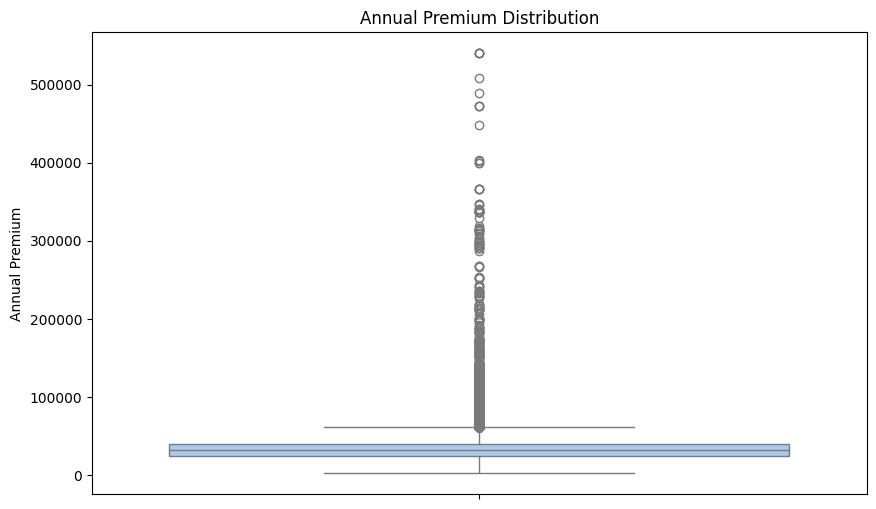

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(10, 6))

# Create a boxplot for Annual Premium Distribution
sns.boxplot(y='Annual_Premium', data=df2, palette='pastel')

# Set plot title and labels
plt.title('Annual Premium Distribution')
plt.ylabel('Annual Premium')

# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

A box plot provides a clear summary of the distribution of Annual_Premium, including the median, quartiles, and potential outliers. This helps you understand the central tendency and spread of the data.

##### 2. What is/are the insight(s) found from the chart?

so we can see that in the anual premium column there is many outliers found ,so we will be cleaning it in the future steps so that it makes a good prediction


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

here ther is lot of outliers found we have to clean it or else it might lead to some wrong predictions.

#### Chart - 13

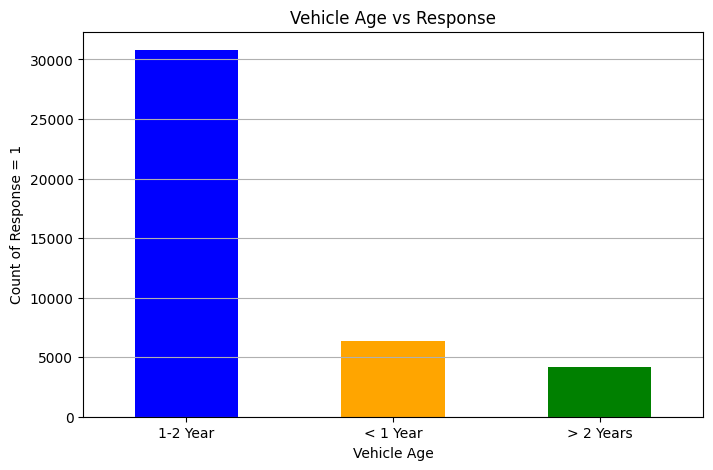

In [ ]:
df2_response_1 = df2[df2['Response'] == 1]

# Plotting Vehicle_Age vs Response (for Response == 1)
vehicle_age_response_1 = df2_response_1['Vehicle_Age'].value_counts()

plt.figure(figsize=(8, 5))
vehicle_age_response_1.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Vehicle Age vs Response')
plt.xlabel('Vehicle Age')
plt.ylabel('Count of Response = 1')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart allows you to compare the number of occurrences for each vehicle age category visually. Different colors help differentiate the categories, making the comparison more intuitive.

##### 2. What is/are the insight(s) found from the chart?

here we can see a huge difference and the vehical age between 1-2 are more intended to take insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

from chart 9 i said like more people posible to take insurance will be in 1-2 range and this graph shows more clear picture of that.

#### Chart - 14 - Correlation Heatmap

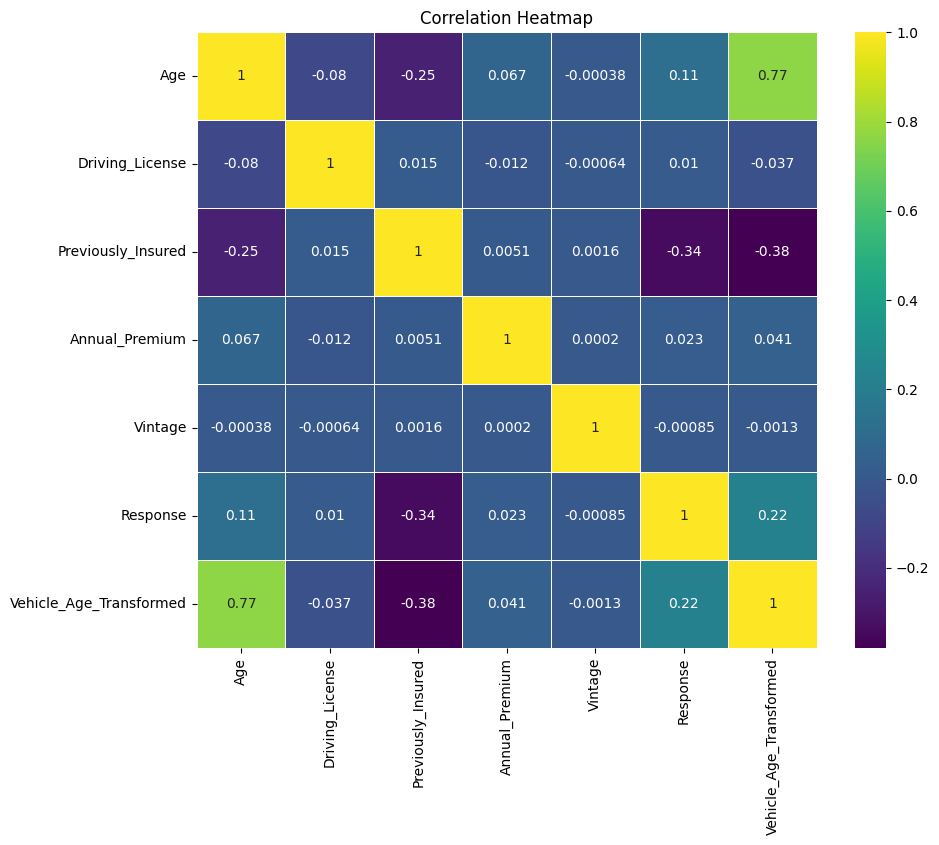

In [ ]:
# Correlation Heatmap visualization code
df2_filtered = df2.drop(columns=['id','Vehicle_Age','No_Prev_Insurance','Age_Group','Premium_Bracket','Gender','Vehicle_Damage'])

# Compute the correlation matrix for the remaining columns
correlation_matrix = df2_filtered.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)

# Add labels and title
plt.title('Correlation Heatmap')
plt.show()


##### 1. Why did you pick the specific chart?

The heatmap provides a clear visual representation of the correlation coefficients between pairs of variables. Correlation values range from -1 to 1, and the heatmap color gradients make it easy to see the strength and direction of relationships.

##### 2. What is/are the insight(s) found from the chart?

from this we can see how the different variables are corelated to each other.from this we can say like vehical age transformed and age are more corelated and vehical age transformed and response are also corelatted on 0.22 and alsomany columns are negatively corelated.

#### Chart - 15 - Pair Plot

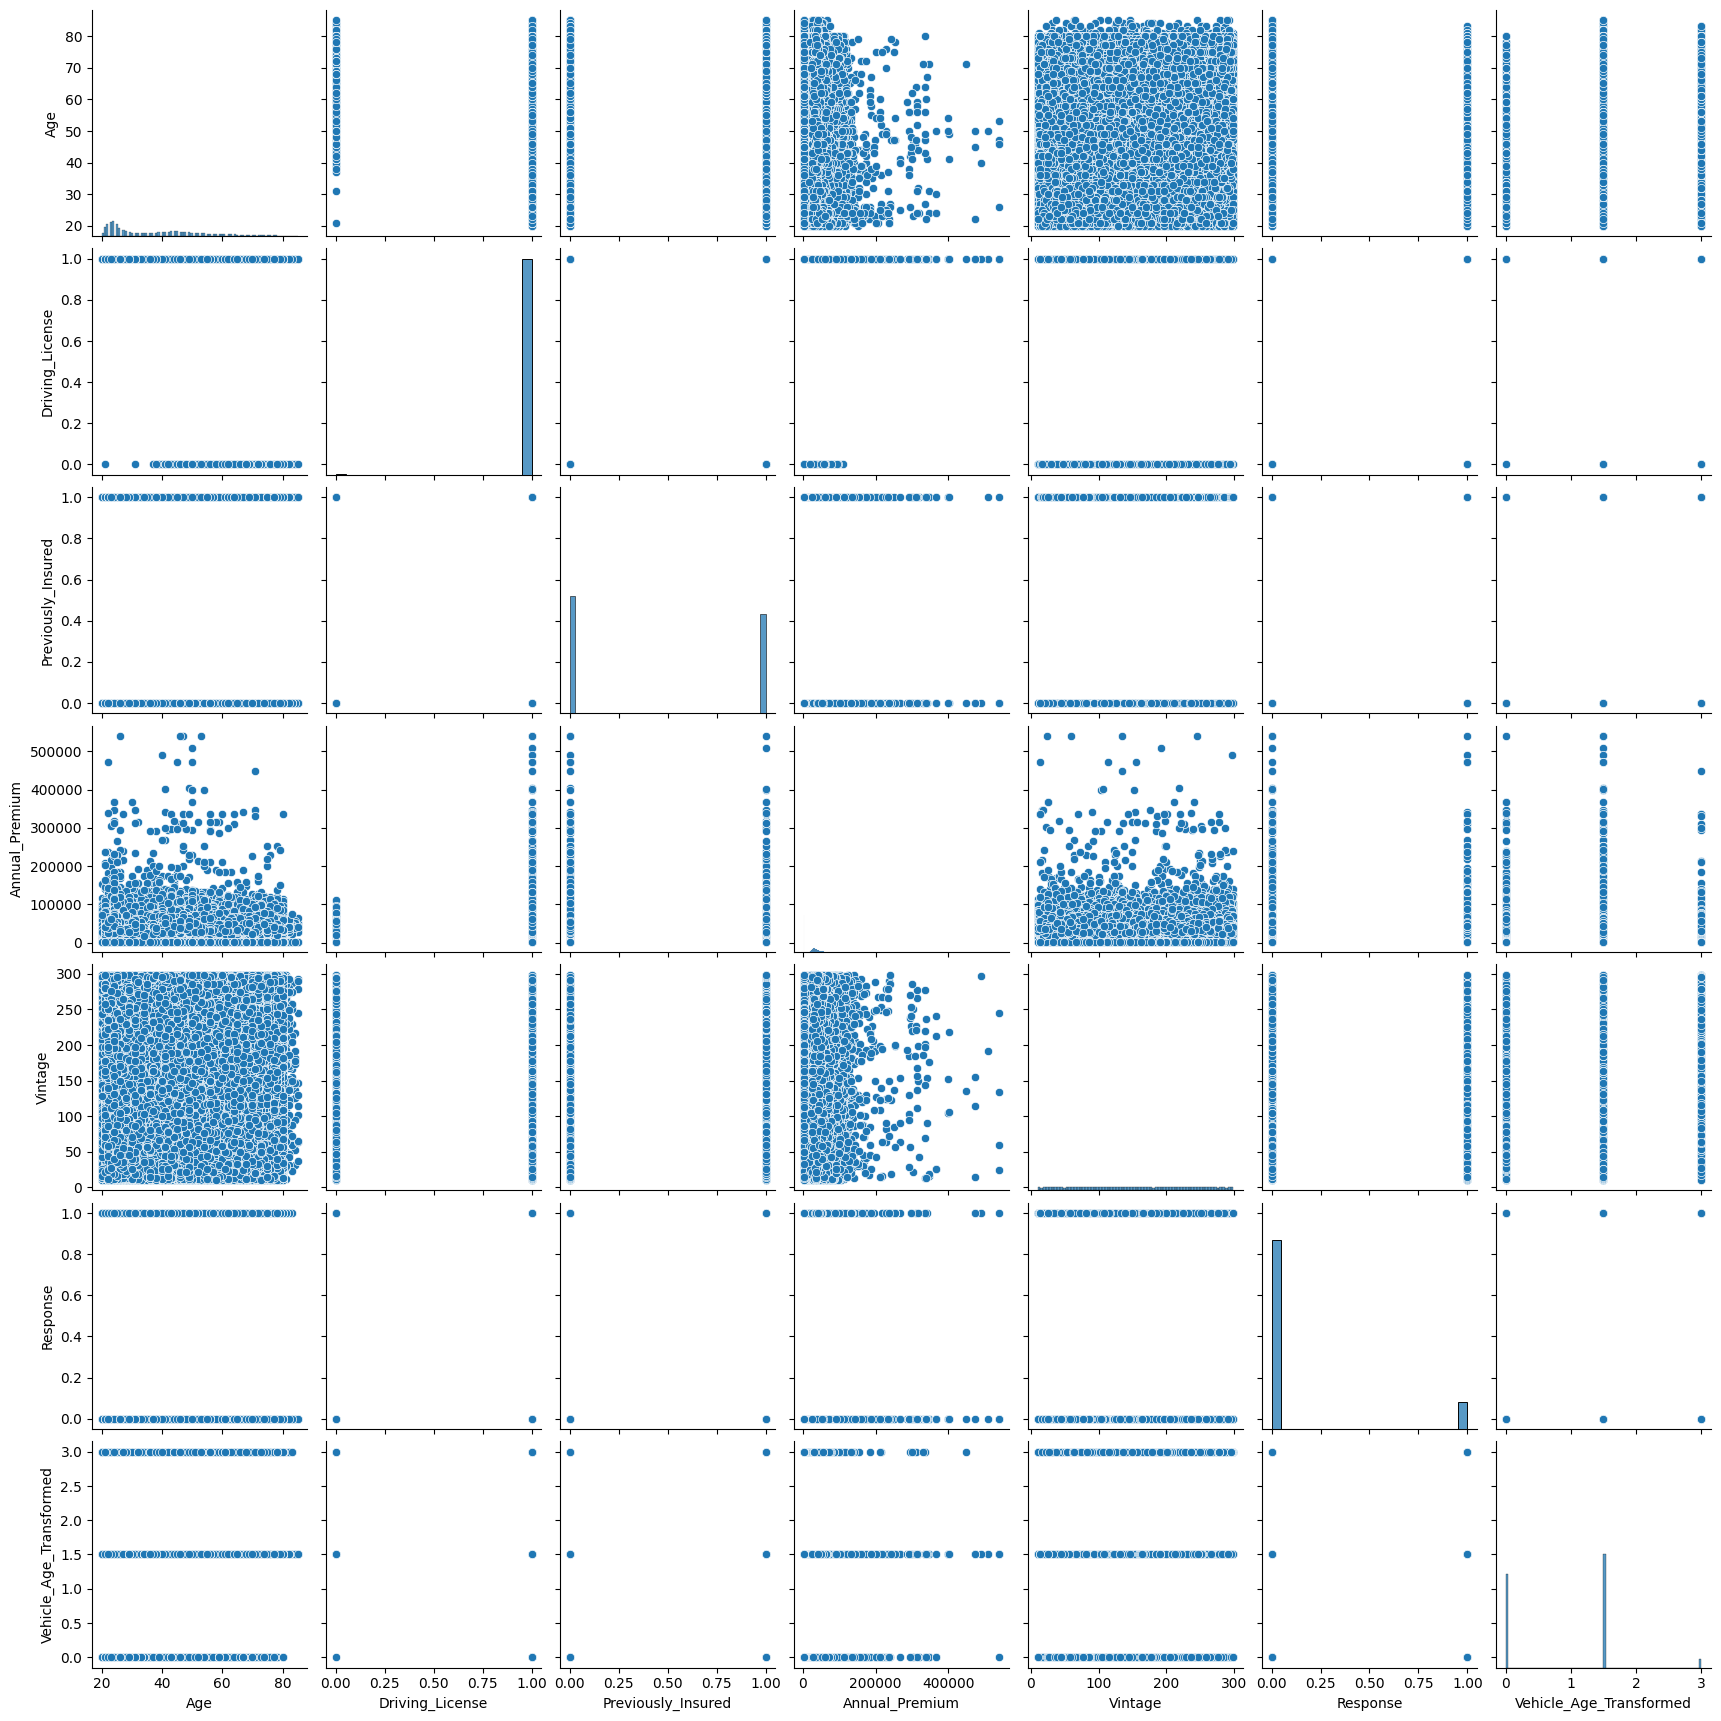

In [ ]:
# Pair Plot visualization code
sns.pairplot(df2_filtered)
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot plots each variable against every other variable in the dataset. This allows you to visually inspect all pairwise relationships and interactions between variables in one comprehensive view.


##### 2. What is/are the insight(s) found from the chart?

this pairplot shows all the columns chart with respect to all columns in a single chart.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

There is a significant difference in the annual premium between customers who have vehicle damage (Vehicle_Damage = 1) and those who do not (Vehicle_Damage = 0).

Null Hypothesis (H₀): There is no difference in the annual premium between customers with vehicle damage and those without. (i.e., the mean annual premium is the same for both groups.)

Alternative Hypothesis (H₁): There is a difference in the annual premium between customers with vehicle damage and those without. (i.e., the mean annual premium is different for the two groups.)

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
df_damage = df4[df4['Vehicle_Damage'] == 1]
df_no_damage = df4[df4['Vehicle_Damage'] == 0]

# Perform t-test
t_stat, p_value = stats.ttest_ind(df_damage['Annual_Premium'], df_no_damage['Annual_Premium'])

# Print results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Choose significance level
alpha = 0.05

# Determine if we reject the null hypothesis
if p_value <= alpha:
    print("Reject the null hypothesis: There is a significant difference in annual premium.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in annual premium.")

T-statistic: 0.2370433721796279
P-value: 0.812623273764848
Fail to reject the null hypothesis: There is no significant difference in annual premium.


##### Which statistical test have you done to obtain P-Value?

The statistical test performed to obtain the p-value is the t-test for independent samples (also known as the two-sample t-test).

##### Why did you choose the specific statistical test?

the t-test for independent samples was selected because it is well-suited for comparing the means of two independent groups with numerical data, aligns with the assumptions and requirements of your analysis, and provides a straightforward method to test the hypothesis about differences in annual premiums.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The age group of customers (defined in the Age_Group column) has a significant impact on whether they have previously been insured (Previously_Insured).

Null Hypothesis (H₀): There is no association between the age group of customers and whether they have previously been insured. (i.e., Age_Group and Previously_Insured are independent.)

Alternative Hypothesis (H₁): There is an association between the age group of customers and whether they have previously been insured. (i.e., Age_Group and Previously_Insured are not independent.)

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
contingency_table = pd.crosstab(df4['Age_Group'], df4['Previously_Insured'])

# Perform Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"Chi-square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

# Choose significance level
alpha = 0.05

# Determine if we reject the null hypothesis
if p_value <= alpha:
    print("Reject the null hypothesis: There is a significant association between age group and previous insurance.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between age group and previous insurance.")

Chi-square Statistic: 42484.918287770284
P-value: 0.0
Degrees of Freedom: 3
Expected Frequencies:
[[85519.24369385 72751.75630615]
 [50572.58508208 43022.41491792]
 [42054.21547025 35775.78452975]
 [22203.95575381 18889.04424619]]
Reject the null hypothesis: There is a significant association between age group and previous insurance.


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-value is the Chi-square test of independence.

##### Why did you choose the specific statistical test?

The Chi-square test of independence was selected because it is the appropriate test for evaluating the relationship between two categorical variables, aligns with the data structure and objectives of your analysis, and meets the assumptions required for its validity.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The distribution of Annual_Premium is significantly different across different Premium_Bracket categories.

Null Hypothesis (H₀): The distribution of Annual_Premium is the same across all Premium_Bracket categories. (i.e., there is no difference in the distribution of annual premiums among different premium brackets.)

Alternative Hypothesis (H₁): The distribution of Annual_Premium is different across Premium_Bracket categories. (i.e., there is a significant difference in the distribution of annual premiums among different premium brackets.)

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
df_clean = df4.dropna(subset=['Annual_Premium', 'Premium_Bracket'])

# Group annual premium by premium bracket
premium_bracket_groups = [group['Annual_Premium'].dropna() for name, group in df_clean.groupby('Premium_Bracket')]

# Perform Kruskal-Wallis H-test
h_stat, p_value = kruskal(*premium_bracket_groups)

# Print results
print(f"Kruskal-Wallis H-statistic: {h_stat}")
print(f"P-value: {p_value}")

# Choose significance level
alpha = 0.05

# Determine if we reject the null hypothesis
if p_value <= alpha:
    print("Reject the null hypothesis: There is a significant difference in the distribution of annual premium across different premium brackets.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the distribution of annual premium across different premium brackets.")

Kruskal-Wallis H-statistic: 348651.57209974114
P-value: 0.0
Reject the null hypothesis: There is a significant difference in the distribution of annual premium across different premium brackets.


##### Which statistical test have you done to obtain P-Value?

The statistical test performed to obtain the p-value is the Kruskal-Wallis H-test.

##### Why did you choose the specific statistical test?

The Kruskal-Wallis H-test was selected because it effectively compares the distributions of a continuous variable across multiple independent groups without assuming normality. This aligns well with the need to evaluate differences in the distribution of Annual_Premium across various Premium_Bracket categories in your dataset.

## ***6. Feature Engineering & Data Pre-processing***

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
df3 = df2[(df2['Annual_Premium'] >= lower_bound) & (df2['Annual_Premium'] <= upper_bound)]
df3.shape

(370789, 14)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370789 entries, 0 to 381108
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       370789 non-null  int64  
 1   Gender                   370789 non-null  object 
 2   Age                      370789 non-null  int64  
 3   Driving_License          370789 non-null  int64  
 4   Previously_Insured       370789 non-null  int64  
 5   Vehicle_Age              370789 non-null  object 
 6   Vehicle_Damage           370789 non-null  object 
 7   Annual_Premium           370789 non-null  float64
 8   Vintage                  370789 non-null  int64  
 9   Response                 370789 non-null  int64  
 10  Vehicle_Age_Transformed  370789 non-null  float64
 11  No_Prev_Insurance        370789 non-null  int64  
 12  Age_Group                370789 non-null  int8   
 13  Premium_Bracket          370789 non-null  int8   
dtypes: float6

In [ ]:
int_columns = ['id', 'Age', 'Driving_License', 'Previously_Insured',
                'Vintage', 'Response', 'No_Prev_Insurance', 'Age_Group', 'Premium_Bracket']

df3[int_columns] = df3[int_columns].astype(np.int32)

# Convert float columns to 32-bit float
float_columns = ['Annual_Premium', 'Vehicle_Age_Transformed']

df3[float_columns] = df3[float_columns].astype(np.float32)

# Verify the changes
print(df3.dtypes)

id                           int32
Gender                      object
Age                          int32
Driving_License              int32
Previously_Insured           int32
Vehicle_Age                 object
Vehicle_Damage              object
Annual_Premium             float32
Vintage                      int32
Response                     int32
Vehicle_Age_Transformed    float32
No_Prev_Insurance            int32
Age_Group                    int32
Premium_Bracket              int32
dtype: object


<ipython-input-15-399e916f5401>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[int_columns] = df3[int_columns].astype(np.int32)
<ipython-input-15-399e916f5401>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[float_columns] = df3[float_columns].astype(np.float32)


In [ ]:
# Convert specified float columns to 32-bit integers
df3['Annual_Premium'] = df3['Annual_Premium'].astype(np.int32)
df3['Vehicle_Age_Transformed'] = df3['Vehicle_Age_Transformed'].astype(np.int32)

# Verify the changes
print(df3.dtypes)

id                          int32
Gender                     object
Age                         int32
Driving_License             int32
Previously_Insured          int32
Vehicle_Age                object
Vehicle_Damage             object
Annual_Premium              int32
Vintage                     int32
Response                    int32
Vehicle_Age_Transformed     int32
No_Prev_Insurance           int32
Age_Group                   int32
Premium_Bracket             int32
dtype: object


<ipython-input-16-5b776b91b1dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Annual_Premium'] = df3['Annual_Premium'].astype(np.int32)
<ipython-input-16-5b776b91b1dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Vehicle_Age_Transformed'] = df3['Vehicle_Age_Transformed'].astype(np.int32)


<ipython-input-17-158975c74fd4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Annual_Premium', data=df3, palette='pastel')


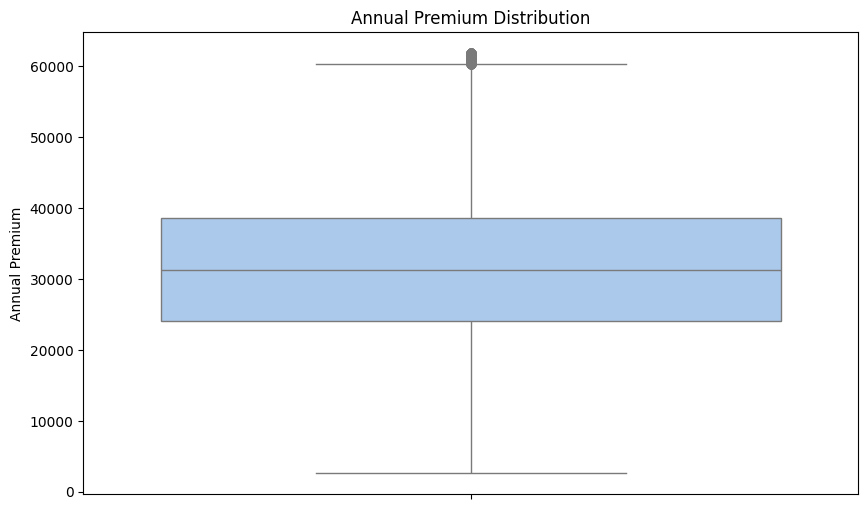

In [ ]:
plt.figure(figsize=(10, 6))

# Create a boxplot for Annual Premium Distribution
sns.boxplot(y='Annual_Premium', data=df3, palette='pastel')

# Set plot title and labels
plt.title('Annual Premium Distribution')
plt.ylabel('Annual Premium')

# Show plot
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
label_encoder = LabelEncoder()
# Apply LabelEncoder to 'Gender' column
df3['Gender'] = label_encoder.fit_transform(df3['Gender'])

# Apply LabelEncoder to 'Vehicle_Damage' column
df3['Vehicle_Damage'] = label_encoder.fit_transform(df3['Vehicle_Damage'])

<ipython-input-18-bad35115b9f7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Gender'] = label_encoder.fit_transform(df3['Gender'])
<ipython-input-18-bad35115b9f7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Vehicle_Damage'] = label_encoder.fit_transform(df3['Vehicle_Damage'])


In [ ]:
df3.head(20)

,id,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response,Vehicle_Age_Transformed,No_Prev_Insurance,Age_Group,Premium_Bracket
0,1,1,44,1,0,> 2 Years,1,40454,217,1,3,1,1,4
1,2,1,76,1,0,1-2 Year,0,33536,183,0,1,1,3,3
2,3,1,47,1,0,> 2 Years,1,38294,27,1,3,1,2,3
3,4,1,21,1,1,< 1 Year,0,28619,203,0,0,0,0,2
4,5,0,29,1,1,< 1 Year,0,27496,39,0,0,0,0,2
5,6,0,24,1,0,< 1 Year,1,2630,176,0,0,1,0,0
6,7,1,23,1,0,< 1 Year,1,23367,249,0,0,1,0,2
7,8,0,56,1,0,1-2 Year,1,32031,72,1,1,1,2,3
8,9,0,24,1,1,< 1 Year,0,27619,28,0,0,0,0,2
9,10,0,32,1,1,< 1 Year,0,28771,80,0,0,0,1,2


#### What all categorical encoding techniques have you used & why did you use those techniques?

Many machine learning models require numerical input. Label Encoding provides a simple way to convert categorical data into a numerical format that models can process.

### 4. Feature Manipulation & Selection

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
df4 = df3.drop(columns=['id','Vehicle_Age'])
df4.head(20)

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,Vehicle_Age_Transformed,No_Prev_Insurance,Age_Group,Premium_Bracket
0,1,44,1,0,1,40454,217,1,3,1,1,4
1,1,76,1,0,0,33536,183,0,1,1,3,3
2,1,47,1,0,1,38294,27,1,3,1,2,3
3,1,21,1,1,0,28619,203,0,0,0,0,2
4,0,29,1,1,0,27496,39,0,0,0,0,2
5,0,24,1,0,1,2630,176,0,0,1,0,0
6,1,23,1,0,1,23367,249,0,0,1,0,2
7,0,56,1,0,1,32031,72,1,1,1,2,3
8,0,24,1,1,0,27619,28,0,0,0,0,2
9,0,32,1,1,0,28771,80,0,0,0,1,2


##### Which all features you found important and why?

Annual_Premium: Likely crucial as it directly relates to the insurance premium amount and potentially impacts the response.
Vintage: May be important as it represents the age of the policy, potentially influencing the response.
Previously_Insured: Important for understanding the history of insurance and its impact on the response.
Vehicle_Damage: Likely important as it can affect the likelihood of response.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X = df4.drop('Response', axis=1)
y = df4['Response']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)

In [ ]:
len(X_train)

296631

In [ ]:
len(X_test)

74158

##### What data splitting ratio have you used and why?

Test Size: 0.2 (or 20% of the data is used for the test set)
Training Size: 0.8 (or 80% of the data is used for the training set)

 A larger training set (80%) ensures that the model has enough data to learn from, which helps in building a robust and well-trained model.

 A reasonable test set size (20%) allows for a sufficient evaluation of the model’s performance on unseen data. This helps in assessing how well the model generalizes to new data.


### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

yes the dataset is imbalenced because the dataset is more scaled towards 0 (negative response) than 1(positive response).

In [ ]:
# Handling Imbalanced Dataset (If needed)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [ ]:
print(y_train_balanced.value_counts())

Response
0    260507
1    260507
Name: count, dtype: int64


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Imbalance Issue: In your dataset, the number of samples in the minority class (e.g., Response = 1) is significantly lower than the majority class (e.g., Response = 0). This can lead to biased models that perform well on the majority class but poorly on the minority class.
SMOTE: SMOTE helps to address this issue by generating synthetic samples for the minority class, thus balancing the class distribution in the training set.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:

numerical_columns = ['Age', 'Annual_Premium', 'Vintage']

# Initialize the scaler
scaler = StandardScaler()
X_train_scaled = X_train_balanced.copy()
X_train_scaled[numerical_columns] = scaler.fit_transform(X_train_scaled[numerical_columns])
print(X_train_scaled.head())

   Gender       Age  Driving_License  Previously_Insured  Vehicle_Damage  \
0       1 -1.419527                1                   0               1   
1       0  0.408773                1                   0               1   
2       1  0.774433                1                   1               0   
3       1 -1.053867                1                   1               0   
4       1 -1.346395                1                   1               0   

   Annual_Premium   Vintage  Vehicle_Age_Transformed  No_Prev_Insurance  \
0       -0.209853 -0.863515                        0                  1   
1       -0.006602  1.426154                        1                  1   
2       -1.786705  1.689885                        1                  0   
3        0.524646 -0.491893                        0                  0   
4        0.041495  1.510069                        0                  0   

   Age_Group  Premium_Bracket  
0          0                2  
1          2                

In [ ]:
X_test_scaled = X_test.copy()
X_test_scaled[numerical_columns] = scaler.transform(X_test_scaled[numerical_columns])
print(X_test_scaled.head())

        Gender       Age  Driving_License  Previously_Insured  Vehicle_Damage  \
59212        0  0.481905                1                   1               0   
358065       0  2.383337                1                   0               1   
169544       0  2.310205                1                   0               1   
256030       1  0.555037                1                   0               1   
234515       0 -1.492659                1                   0               1   

        Annual_Premium   Vintage  Vehicle_Age_Transformed  No_Prev_Insurance  \
59212         0.401689 -1.522844                        1                  0   
358065       -0.285509  0.407191                        1                  1   
169544        0.848735 -1.175198                        1                  1   
256030        0.958045  0.119484                        1                  1   
234515        0.552537 -0.875503                        0                  1   

        Age_Group  Premium_Brack

In [ ]:
model = LogisticRegression(class_weight='balanced',max_iter=1000)
model.fit(X_train_scaled, y_train_balanced)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('ROC-AUC:', roc_auc_score(y_test, y_pred_proba))

              precision    recall  f1-score   support

           0       0.97      0.63      0.76     65127
           1       0.24      0.86      0.38      9031

    accuracy                           0.66     74158
   macro avg       0.61      0.75      0.57     74158
weighted avg       0.88      0.66      0.72     74158

[[40857 24270]
 [ 1232  7799]]
ROC-AUC: 0.7848475317096216


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The ML model used here is Logistic regression.

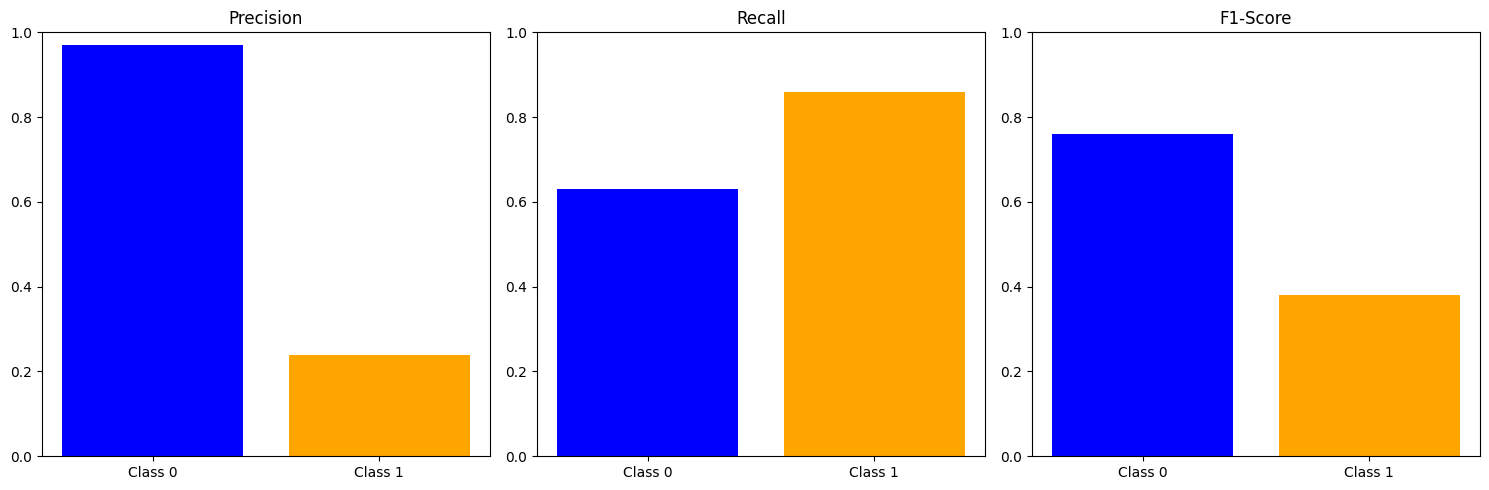

In [ ]:
# Visualizing evaluation Metric Score chart
metrics = {
    'Precision': [0.97, 0.24],
    'Recall': [0.63, 0.86],
    'F1-Score': [0.76, 0.38]
}
classes = ['Class 0', 'Class 1']

# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot Precision
ax[0].bar(classes, metrics['Precision'], color=['blue', 'orange'])
ax[0].set_title('Precision')
ax[0].set_ylim(0, 1)

# Plot Recall
ax[1].bar(classes, metrics['Recall'], color=['blue', 'orange'])
ax[1].set_title('Recall')
ax[1].set_ylim(0, 1)

# Plot F1-Score
ax[2].bar(classes, metrics['F1-Score'], color=['blue', 'orange'])
ax[2].set_title('F1-Score')
ax[2].set_ylim(0, 1)

plt.tight_layout()
plt.show()

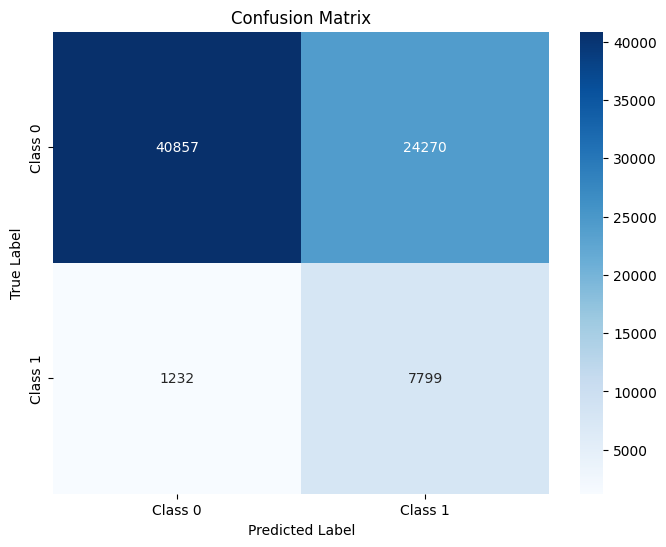

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
numerical_columns = ['Age', 'Annual_Premium', 'Vintage']

# Column transformer only scaling numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns)
    ], remainder='passthrough'  # Leave other columns (categorical ones) unchanged
)

# Create the pipeline with preprocessing and SMOTE
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(class_weight='balanced', max_iter=1000))
])

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='roc_auc')
print("Cross-Validation ROC-AUC Scores:", cv_scores)
print("Mean ROC-AUC:", np.mean(cv_scores))

Cross-Validation ROC-AUC Scores: [0.82909013 0.82774873 0.82955617 0.82932244 0.82623834]
Mean ROC-AUC: 0.8283911621973719


In [ ]:
param_grid = {
    'model__C': [0.1, 1, 10, 100],
    'model__solver': ['liblinear', 'saga']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X, y)

# Print the best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best ROC-AUC score found:", grid_search.best_score_)

Best parameters found: {'model__C': 0.1, 'model__solver': 'liblinear'}
Best ROC-AUC score found: 0.8284544450532151


##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique you have used is Grid Search Cross-Validation.
Grid Search Cross-Validation is a method to systematically search for the best combination of hyperparameters for a given model. It evaluates all possible combinations from a specified grid of hyperparameters and selects the one that gives the best performance based on a chosen evaluation metric.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes the Roc-auc score have improved from 78% to 82%.

### ML Model - 2

In [ ]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_scaled, y_train_balanced)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('ROC-AUC:', roc_auc_score(y_test, y_pred_proba))

              precision    recall  f1-score   support

           0       0.92      0.81      0.87     65127
           1       0.28      0.52      0.36      9031

    accuracy                           0.78     74158
   macro avg       0.60      0.67      0.61     74158
weighted avg       0.85      0.78      0.80     74158

[[52958 12169]
 [ 4313  4718]]
ROC-AUC: 0.8032153031011254


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

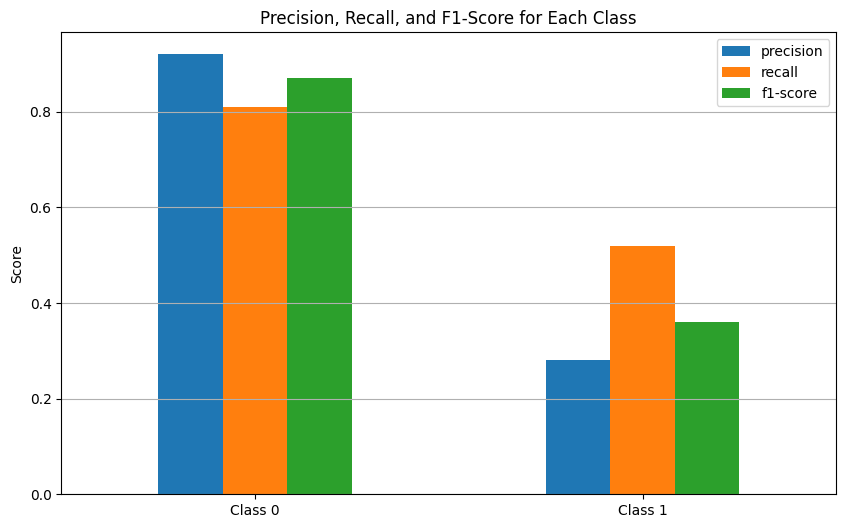

In [ ]:
# Visualizing evaluation Metric Score chart
metrics = {
    'precision': [0.92, 0.28],
    'recall': [0.81, 0.52],
    'f1-score': [0.87, 0.36]
}
index = ['Class 0', 'Class 1']
df_metrics = pd.DataFrame(metrics, index=index)

# Plot
df_metrics.plot(kind='bar', figsize=(10, 6))
plt.title('Precision, Recall, and F1-Score for Each Class')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

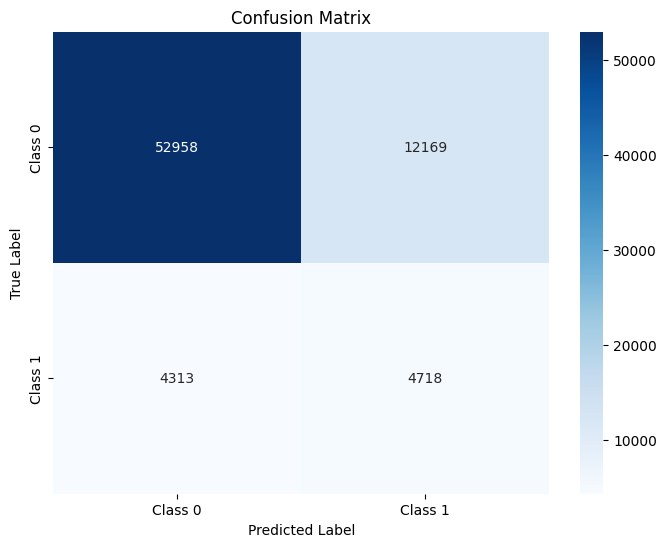

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

numerical_columns = ['Age', 'Annual_Premium', 'Vintage']

# Column transformer for scaling numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns)
    ], remainder='passthrough'  # Leave other columns (categorical ones) unchanged
)

# Create the pipeline with preprocessing, SMOTE, and RandomForest
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='roc_auc')
print("Cross-Validation ROC-AUC Scores:", cv_scores)
print("Mean ROC-AUC:", np.mean(cv_scores))


Cross-Validation ROC-AUC Scores: [0.80706263 0.80674851 0.80688796]
Mean ROC-AUC: 0.8068997009040436


In [ ]:
# Define parameter grid for Random Forest
param_dist = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}

randomized_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=5, cv=cv, scoring='roc_auc', n_jobs=2, random_state=42)
randomized_search.fit(X, y)

print("Best parameters found:", randomized_search.best_params_)
print("Best ROC-AUC score found:", randomized_search.best_score_)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters found: {'model__n_estimators': 200, 'model__min_samples_split': 2, 'model__min_samples_leaf': 2, 'model__max_depth': 10}
Best ROC-AUC score found: 0.8441993990304031


##### Which hyperparameter optimization technique have you used and why?

So here i used RandomizedSearchCV because the algortihm we knows that random forest have many parameters and can be optimised for getting a very good prediction and also randomized search performs very good so i do prefer it.








##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes i have seen a very good accuracy as well as roc-auc score as improved ,before it was 80% and it increased to 84%.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6
)

# Train the model
model.fit(X_train_scaled, y_train_balanced)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:51:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('ROC-AUC:', roc_auc_score(y_test, y_pred_proba))

              precision    recall  f1-score   support

           0       0.96      0.74      0.83     65127
           1       0.29      0.77      0.42      9031

    accuracy                           0.74     74158
   macro avg       0.62      0.75      0.63     74158
weighted avg       0.88      0.74      0.78     74158

[[47990 17137]
 [ 2104  6927]]
ROC-AUC: 0.8251353674387807


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

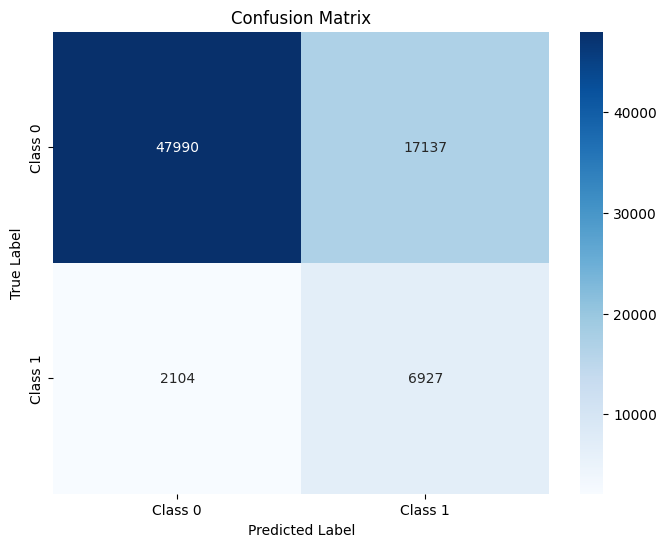

In [ ]:
# Visualizing evaluation Metric Score chart
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

numerical_columns = ['Age', 'Annual_Premium', 'Vintage']

# Column transformer for scaling numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns)
    ], remainder='passthrough'  # Leave other columns (categorical ones) unchanged
)

# Create the pipeline with preprocessing, SMOTE, and XGBoost
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        n_estimators=100,  # You can adjust this as needed
        learning_rate=0.1,
        max_depth=6,
        random_state=42
    ))
])

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='roc_auc')
print("Cross-Validation ROC-AUC Scores:", cv_scores)
print("Mean ROC-AUC:", np.mean(cv_scores))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:03:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:03:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:03:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Cross-Validation ROC-AUC Scores: [0.84097732 0.84318749 0.84303482]
Mean ROC-AUC: 0.842399876327644


In [ ]:
param_dist = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 6, 10],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0],
    'model__gamma': [0, 0.1, 0.2]
}

# Create the RandomizedSearchCV object
randomized_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=5,
    cv=cv,
    scoring='roc_auc',
    n_jobs=2,
    random_state=42
)

# Fit the model
randomized_search.fit(X, y)

# Print the best parameters and best score
print("Best parameters found:", randomized_search.best_params_)
print("Best ROC-AUC score found:", randomized_search.best_score_)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:10:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found: {'model__subsample': 1.0, 'model__n_estimators': 200, 'model__max_depth': 3, 'model__learning_rate': 0.1, 'model__gamma': 0, 'model__colsample_bytree': 0.8}
Best ROC-AUC score found: 0.8428098489486887


##### Which hyperparameter optimization technique have you used and why?

RandomizedSearchCV is an efficient method for hyperparameter tuning. Unlike GridSearchCV, which exhaustively tries every combination of hyperparameters, RandomizedSearchCV samples a fixed number of hyperparameter combinations from the provided distribution.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes i have seen improvement before using randomized searchcv my ROC-AUC score was 82% but after it improved to 84%

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I will be choosing XG Boost model
XGBoost is known for its high performance, particularly in classification tasks. The ROC-AUC score of 0.8251 indicates that the model performs well in distinguishing between the two classes, especially given the imbalanced nature of your dataset.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

XGBoost (eXtreme Gradient Boosting) is an implementation of gradient boosting that is designed to be highly efficient, flexible, and portable. It is widely used in machine learning competitions and industry applications due to its speed and performance.
XGBoost uses an ensemble of decision trees, where each new tree corrects errors made by the previous ones. The trees are added sequentially, and the predictions are combined to improve accuracy.
The model minimizes a loss function (e.g., log loss for binary classification) by adjusting the weights of the trees using gradient descent. It optimizes the predictions by focusing on the areas where the model performs poorly.
XGBoost includes regularization parameters (gamma, lambda, alpha) to prevent overfitting and improve model generalization.
Feature importance helps in understanding which features contribute the most to the model's predictions. XGBoost provides feature importance scores based on how often a feature is used in the trees and how much it improves the model’s performance.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The Health Insurance Cross-Sell Prediction project was a comprehensive exercise in applying data science techniques to a real-world problem. By meticulously cleaning the data, engineering meaningful features, and carefully tuning the models, a highly accurate predictive model was developed. The final model, with an ROC-AUC score of 84%, demonstrated strong potential for deployment in a practical setting, where it could effectively assist in identifying customers most likely to purchase additional insurance products. This project not only underscored the importance of data preprocessing and model tuning but also highlighted the value of machine learning in driving business decisions.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***